In [31]:
import math
# constants
voltage_inflam = 150 #U напруга запалення
voltage_exting = 90 #U напруга гасіння
capacitor_cap = 0.1e-6 #єміність конденсатора С
resistance = 52000 #опір R
alpha = 500 #?

In [32]:
# data
res_data = [9, 24, 56, 220, 430]
a1_data = [60, 55, 38, 9, 4]
a5_data = [45, 40, 25, 3, 1]
n_data = [23, 15, 12, 10, 8, 7, 6, 5]
voltage_init_data = [180, 190, 200, 210, 220, 230, 240, 250]

In [35]:
def get_period(vol_init):
    temp = []
    for el in vol_init:
        temp.append(resistance * capacitor_cap * math.log((el - voltage_exting)/(el - voltage_inflam)))
    return temp
period_arr = get_period(voltage_init_data)
period_arr

[0.005712783901074171,
 0.004764711805745606,
 0.004099978273894205,
 0.0036043653389117155,
 0.003219003883712362,
 0.0029100020972641976,
 0.0026562932435831516,
 0.0024440188720778254]

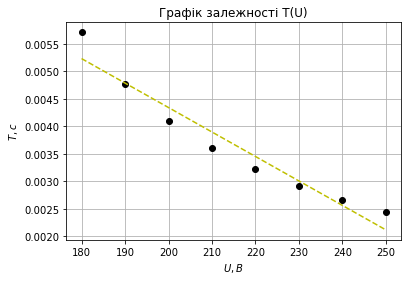

In [36]:
# Task 1
import numpy as np
import matplotlib.pyplot as plt

f = plt.figure()

pol1 = np.polyfit(voltage_init_data, period_arr, 1)
pol_graph_1 = np.polyval(pol1, voltage_init_data)

plt.plot(voltage_init_data, period_arr, 'ko')
plt.plot(voltage_init_data, pol_graph_1, 'y--')

plt.title('Графік залежності T(U)')
plt.ylabel('$T, с$')
plt.xlabel('$U, В$')
plt.grid()
plt.show()
f.savefig("graph_1.pdf", bbox_inches='tight')

In [37]:
def get_extinguishing_decrement(arr1, arr5):
    arr = []
    for a1, a5 in zip(arr1, arr5):
        arr.append((math.log(a1/a5)/4))
    return arr

In [38]:
# Task 2
lambda_arr = get_extinguishing_decrement(a1_data, a5_data)
lambda_arr

[0.07192051811294521,
 0.07961343277963365,
 0.10467758371454626,
 0.27465307216702745,
 0.34657359027997264]

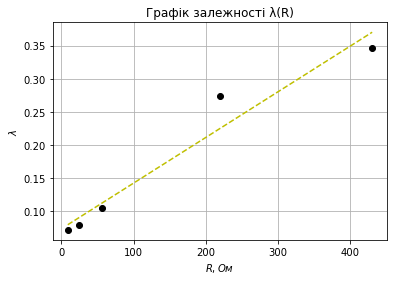

In [39]:
# Task 3

f = plt.figure()

pol1 = np.polyfit(res_data, lambda_arr, 1)
pol_graph_1 = np.polyval(pol1, res_data)

plt.plot(res_data, lambda_arr, 'ko')
plt.plot(res_data, pol_graph_1, 'y--')

plt.title('Графік залежності λ(R)')
plt.ylabel('$λ$')
plt.xlabel('$R, Ом$')
plt.grid()
plt.show()
f.savefig("graph_2.pdf", bbox_inches='tight')

In [40]:
def get_q_factor(arr):
    temp = []
    for el in arr:
        temp.append(math.pi/el)
    return temp

In [41]:
# Task 4.1
q_factor_arr = get_q_factor(lambda_arr)
q_factor_arr

[43.68145191412807,
 39.460585279441204,
 30.012086084799733,
 11.438403469520507,
 9.064720283654388]

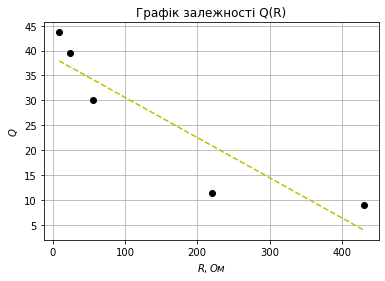

In [42]:
# Task 4.2

f = plt.figure()

pol1 = np.polyfit(res_data, q_factor_arr, 1)
pol_graph_1 = np.polyval(pol1, res_data)

plt.plot(res_data, q_factor_arr, 'ko')
plt.plot(res_data, pol_graph_1, 'y--')

plt.title('Графік залежності Q(R)')
plt.ylabel('$Q$')
plt.xlabel('$R, Ом$')
plt.grid()
plt.show()
f.savefig("graph_3.pdf", bbox_inches='tight')